      iteration  stagnated  total_particles  global_best_fitness  \
0             1          1               16            20.404146   
1             2          0               16            20.176905   
2             3          0               16            20.019089   
3             4          1               16            20.019089   
4             5          2               16            20.019089   
...         ...        ...              ...                  ...   
6125       6126       4996               16            20.000000   
6126       6127       4997               16            20.000000   
6127       6128       4998               16            20.000000   
6128       6129       4999               16            20.000000   
6129       6130       5000               16            20.000000   

                         global_best_position  mean_best_particles_fitness  \
0      [94.67788587527676, 67.76681950077224]                    21.428060   
1     [101.70489340761834, 

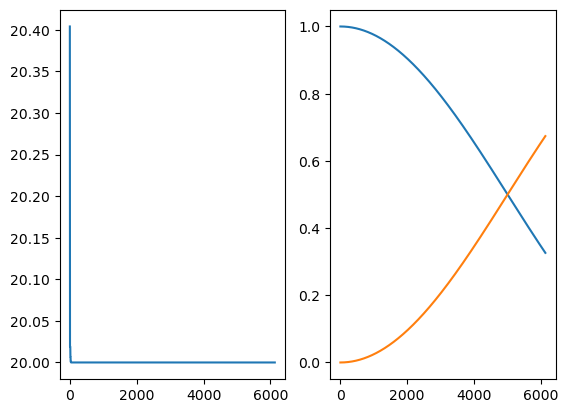

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from optimization.swarmintelligence.particleswarm import ParticleSwarmSystem, Dimension

def easy_bounds(bound):
    return (-bound, bound, -bound, bound)

def check_dim(dim, min = 1):
    assert (type(dim) == int and dim >=min), f"Dimension should be int and not less than {min} for this function (got {dim})"

class Ackley:
    
    b = 100
    
    def __init__(self, dim):
        
        check_dim(dim, 1)
        
        self.x_best = np.zeros(dim)
        self.f_best = 0
        
        self.bounds = easy_bounds(Ackley.b)
        
        self.bias = 20 + math.e
        self.pi2 = 2 * math.pi
    
    def __call__(self, vec):
        
        s1 = sum((x*x for x in vec))/vec.size
        s2 = sum((math.cos(self.pi2 * x) for x in vec))/vec.size
        
        return self.bias - 20*math.exp(-0.2*s1) - math.exp(s2)

## Need to be able to maximise or minimise.
a = Ackley(2)
psystem = ParticleSwarmSystem([Dimension(0.0, 100.0, 5.0), Dimension(0.0, 100.0, 5.0)], a, maximise=False)

result, data = psystem.run(total_particles=16,
                           init_strategy="random",
                           iterations_limit=10000,
                           stagnation_limit=0.5,
                           coef_decay=1.0,
                           coef_decay_type="sin",
                           gather_stats=True,
                           bounce=False,
                           parallelise=False)

print(data)

fig, (fitness_axes, coefficient_axes) = plt.subplots(1, 2)
fitness_axes.plot(data["iteration"], data["global_best_fitness"])
coefficient_axes.plot(data["iteration"], data["personal_coef"])
coefficient_axes.plot(data["iteration"], data["global_coef"])
plt.show()

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from optimization.swarmintelligence.particleswarm import ParticleSwarmSystem, Dimension

from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import simulate_control

pend_system = InvertedPendulumSystem()
controller = PIDController(Kp=0.0, Ki=0.0, Kd=0.0, initial_error=pend_system.get_error())

ticks: int = 100
delta_time: float = 0.1

def control_evaluator(vec):
    controller.reset()
    controller.set_gains(*vec)
    pend_system.reset()
    return simulate_control(pend_system, controller, ticks, delta_time)

psystem = ParticleSwarmSystem([Dimension(0.0, 25.0, 2.5),
                               Dimension(0.0, 5.0, 0.5),
                               Dimension(0.0, 10.0, 1.0)],
                              control_evaluator,
                              maximise=False)

result, data = psystem.run(total_particles=100,
                           init_strategy="linspace",
                           iterations_limit=1000,
                           stagnation_limit=1.0,
                           inertia=1.0,
                           final_inertia=0.25,
                           inertia_decay=1.0,
                           inertia_decay_type="lin",
                           personal_coef=2.0,
                           final_global_coef=1.5,
                           use_neighbourhood=False,
                           coef_decay=1.0,
                           coef_decay_type="sin",
                           bounce=False,
                           use_fitness_approximation=False,
                           fitness_approximation_method="dtr",
                           parallelise=True,
                           gather_stats=True)

print(f"Best position :: {result.best_position}")

fig, (fitness_axes, position_axes, velocity_axes, coefficient_axes) = plt.subplots(1, 4)
fitness_axes.plot(data["iteration"], data["global_best_fitness"], label="Global best fitness")
# fitness_axes.plot(data["iteration"], data["mean_best_particles_fitness"], label="Mean best particles fitness")
# fitness_axes.plot(data["iteration"], data["std_particles_fitness"], label="Std current particles fitness")
position_axes.plot(data["iteration"], data["mean_distance_from_global_best"], "b", label="Mean distance from global best")
position_axes.plot(data["iteration"], data["mean_distance_from_global_best"] + data["std_distance_from_global_best"], "r--", label="Std distance from global best")
position_axes.plot(data["iteration"], data["mean_distance_from_global_best"] - data["std_distance_from_global_best"], "r--", label="Std distance from global best")
velocity_axes.plot(data["iteration"], data["mean_velocity"], "b", label="Mean velocity")
velocity_axes.plot(data["iteration"], data["mean_velocity"] + data["std_velocity"], "r--", label="Std velocity")
velocity_axes.plot(data["iteration"], data["mean_velocity"] - data["std_velocity"], "r--", label="Std velocity")
coefficient_axes.plot(data["iteration"], data["personal_coef"], label="personal")
coefficient_axes.plot(data["iteration"], data["global_coef"], label="global")
coefficient_axes.plot(data["iteration"], data["neighbour_coef"], label="global")
coefficient_axes.legend()
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=2.0)
plt.show()


particles_positions (100, 3) float64
dask_array (100, 3) float64
dask_array (100, 3) float64


IndexError: tuple index out of range

Error curve turning points: [1.9 6.6]


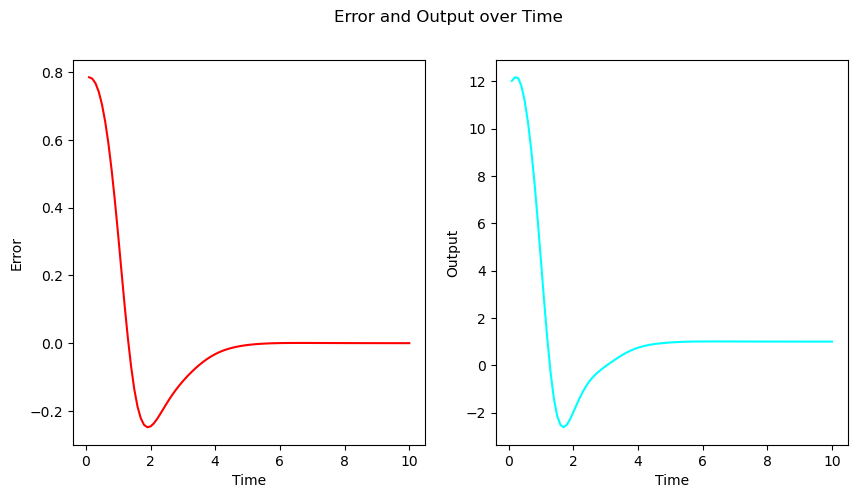

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from auxiliary.numpyutils import get_turning_points

def plot_error(time_points, error_values, output_values) -> None:
    figure, (error_axis, output_axis) = plt.subplots(1, 2)
    figure.suptitle("Error and Output over Time")
    error_axis.plot(time_points, error_values, color="red", label="Error")
    error_axis.set_xlabel("Time"); error_axis.set_ylabel("Error")
    output_axis.plot(time_points, output_values, color="cyan", label="Output")
    output_axis.set_xlabel("Time"); output_axis.set_ylabel("Output")
    figure.subplots_adjust(wspace=0.2)
    figure.set_size_inches(10, 5)

pend_system = InvertedPendulumSystem()
controller = PIDController(*result.best_position, initial_error=pend_system.get_error())

ticks: int = 100
delta_time: float = 0.1

time_points = np.full(ticks, delta_time).cumsum()
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    error = pend_system.get_error()
    output = controller.control_output(error, delta_time, abs_tol=None)
    pend_system.set_output(output, delta_time)
    error_values[tick] = error
    output_values[tick] = output
controller.reset()

print(f"Error curve turning points: {time_points[get_turning_points(error_values)]}")

plot_error(time_points, error_values, output_values)